## 3ª Parte:

## Análise dados gerais e resumos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import re

## I. Introdução

Os trabalhos sobre Escola sem Partido disponíveis no site de Teses e Dissertações da Capes totalizou 221 casos, apenas 171 possuem resumos.

Os dados foram obtidos em duas fases. Obtenção da listagem com dados dos trabalhos. Na segunda, coletei os resumos dos disponíveis. O processo resultou em dois bancos de dados. 

O primeiro dataset contém dados institucionais, título, tipo do trabalho (dissertação ou tese), data da defesa e programa onde o foi desenvolvido. O segundo banco, além dos dados citados, apresenta o resumo completo dos trabalhos, palavras-chave e link apontando para o trabalho completo.

A presente análise visa oferecer dados sobre a evolução da produção sobre Escola sem Partido e "ideologia de gênero".

Apresento dados quantitativos, descrevendo sua evolução no tempo, recorrências, que podem ajudar a gerar insigths para a escrita do trabalho.

A primeira parte é técnica. A sequência das duas sessões será de análise.

A listagem com todos os trabalho usarei para encontrar frequências gerais, equanto a lista com resumos será usada para fabricar listas com os trabalhos em cada temática, para facilitar o trabalho de revisão bibliográfica.

### Importando Arquivos

#### 1. Todos os trabalhos sobre Escola sem Partido

In [2]:
arquivo = (r'C:\Users\Andre G\Documents\Pesquisa\Scripts Webscraping\Modelo Sucupira (Capes)\Scraping Capes\TesesDissertacoes_ESP_Geral.csv')
tab = pd.read_csv(arquivo, header=0)

In [3]:
# amostra
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         221 non-null    int64 
 1   id                 221 non-null    object
 2   instituicao        221 non-null    object
 3   nomePrograma       221 non-null    object
 4   municipioPrograma  221 non-null    object
 5   titulo             221 non-null    object
 6   autor              221 non-null    object
 7   dataDefesa         221 non-null    object
 8   volumes            221 non-null    object
 9   paginas            221 non-null    object
 10  biblioteca         221 non-null    object
 11  grauAcademico      221 non-null    object
 12  link               171 non-null    object
dtypes: int64(1), object(12)
memory usage: 22.6+ KB


#### 2. Trabalhos com resumos dísponíveis

In [4]:
arquivo1 = (r'C:\Users\Andre G\Documents\Pesquisa\Scripts Webscraping\Modelo Sucupira (Capes)\Scraping Resumos\Resumos_ESP.csv')
suc = pd.read_csv(arquivo1, header=0)

In [5]:
# Amostra
suc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     171 non-null    int64 
 1   IES            171 non-null    object
 2   Programa       171 non-null    object
 3   Cod_Area       171 non-null    object
 4   Titulo         171 non-null    object
 5   Autor          171 non-null    object
 6   Tipo           171 non-null    object
 7   Defesa         171 non-null    object
 8   Resumo         171 non-null    object
 9   Keywords       171 non-null    object
 10  link_trabalho  171 non-null    object
dtypes: int64(1), object(10)
memory usage: 14.8+ KB


### Tratamento no banco

#### a. Tratar missing values

In [6]:
#espaços nulos 'suc'?
suc.isnull().sum()

Unnamed: 0       0
IES              0
Programa         0
Cod_Area         0
Titulo           0
Autor            0
Tipo             0
Defesa           0
Resumo           0
Keywords         0
link_trabalho    0
dtype: int64

In [7]:
#espaços nulos 'tab'?
tab.isnull().sum()

Unnamed: 0            0
id                    0
instituicao           0
nomePrograma          0
municipioPrograma     0
titulo                0
autor                 0
dataDefesa            0
volumes               0
paginas               0
biblioteca            0
grauAcademico         0
link                 50
dtype: int64

In [8]:
#Preenche os espaços em branco "suc" por 'zero'
#suc['area'] = suc.area.fillna(0)

#### b. Coloca fonte em minúsulo

In [9]:
#suc = suc.apply(lambda x: x.astype(str).str.lower())

In [10]:
#tab = tab.apply(lambda x: x.astype(str).str.lower())
tab['nomePrograma'] = tab['nomePrograma'].str.lower()

#### c. Declara coluna 'data da defesa' para 'datetime'.

In [11]:
#A intenção é posteriormene plotar um gráfico para verificar o comportamento das publicações no tempo.
suc['Defesa'] = pd.to_datetime(suc['Defesa'])
tab['dataDefesa'] = pd.to_datetime(tab['dataDefesa'])

#### d. Ano da defesa do trabalho

In [12]:
suc['anos'] = suc.Defesa.dt.year
tab['anos'] = tab.dataDefesa.dt.year

In [13]:
suc.shape

(171, 12)

In [14]:
tab.shape

(221, 14)

## II. Análise Geral

#### Qual é a distribuição no tempo?

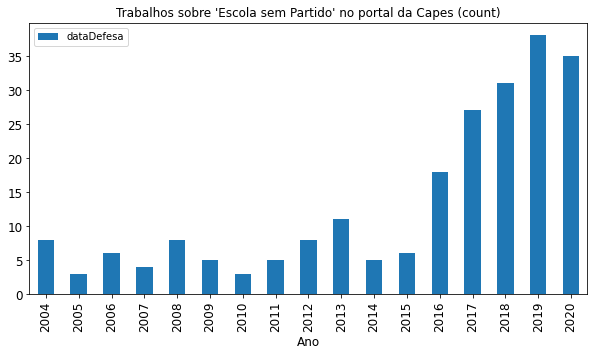

In [15]:
ax = tab.dataDefesa.dt.year.value_counts().sort_index().plot.bar(title ="Trabalhos sobre 'Escola sem Partido' no portal da Capes (count)", figsize=(10, 5), legend=True,fontsize=12).set_xlabel("Ano", fontsize=12)
fig = ax.get_figure()
fig.savefig('trabalhos.pdf')

Text(0.5, 0, 'Ano (Count)')

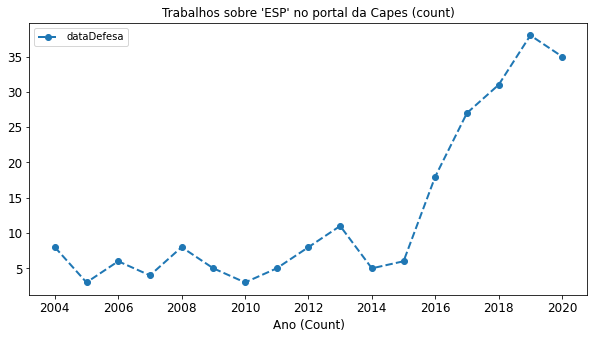

In [16]:
tab.dataDefesa.dt.year.value_counts().sort_index().plot(title ="Trabalhos sobre 'ESP' no portal da Capes (count)", marker='o', figsize=(10, 5),linewidth=2, linestyle='dashed', legend=True, fontsize=12).set_xlabel("Ano (Count)", fontsize=12)

#### Qual é a distribuição de teses e dissertações?

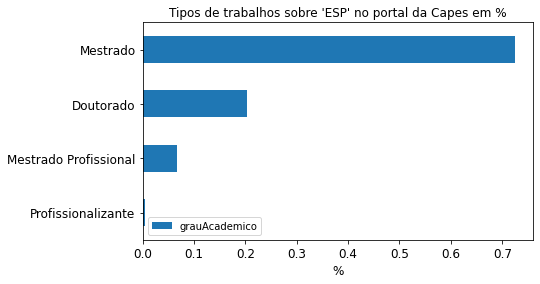

In [17]:
x = tab.grauAcademico.value_counts(normalize=True).sort_values().plot.barh(title ="Tipos de trabalhos sobre 'ESP' no portal da Capes em %", figsize=(7, 4), legend=True, fontsize=12).set_xlabel("%", fontsize=12)
x.get_figure().savefig('area.pdf', format='pdf')

#### Lista de defesas por ano?

In [18]:
tab.dataDefesa.dt.year.value_counts().sort_index()

2004     8
2005     3
2006     6
2007     4
2008     8
2009     5
2010     3
2011     5
2012     8
2013    11
2014     5
2015     6
2016    18
2017    27
2018    31
2019    38
2020    35
Name: dataDefesa, dtype: int64

#### Distribuição do ano por tipo de trabalho?

In [19]:
tab.groupby(tab.dataDefesa.dt.year).grauAcademico.value_counts().sort_index()

dataDefesa  grauAcademico        
2004        Doutorado                 1
            Mestrado                  7
2005        Mestrado                  3
2006        Doutorado                 1
            Mestrado                  5
2007        Doutorado                 2
            Mestrado                  2
2008        Mestrado                  8
2009        Mestrado                  5
2010        Mestrado                  3
2011        Doutorado                 2
            Mestrado                  3
2012        Doutorado                 2
            Mestrado                  5
            Profissionalizante        1
2013        Doutorado                 3
            Mestrado                  8
2014        Doutorado                 3
            Mestrado                  2
2015        Doutorado                 2
            Mestrado                  4
2016        Doutorado                 5
            Mestrado                 12
            Mestrado Profissional     1
2017  

#### Qual é o curso de origem dos trabalhos?

In [20]:
tab.nomePrograma.value_counts(normalize=True)[:10]

educação                       0.230769
história                       0.072398
letras                         0.054299
ciências sociais               0.045249
história social                0.027149
ciências da religião           0.022624
teologia                       0.022624
sociologia em rede nacional    0.022624
ciência da religião            0.018100
psicologia                     0.018100
Name: nomePrograma, dtype: float64

In [21]:
tab.nomePrograma.value_counts(normalize=True)[:20]   

educação                       0.230769
história                       0.072398
letras                         0.054299
ciências sociais               0.045249
história social                0.027149
ciências da religião           0.022624
teologia                       0.022624
sociologia em rede nacional    0.022624
ciência da religião            0.018100
psicologia                     0.018100
geografia                      0.018100
administração                  0.018100
sociologia                     0.018100
comunicação                    0.013575
política social                0.013575
estudos de linguagem           0.013575
sociedade e desenvolvimento    0.013575
ciências da linguagem          0.013575
ciências das religiões         0.013575
saúde coletiva                 0.009050
Name: nomePrograma, dtype: float64

#### Origem principal dos trabalhos

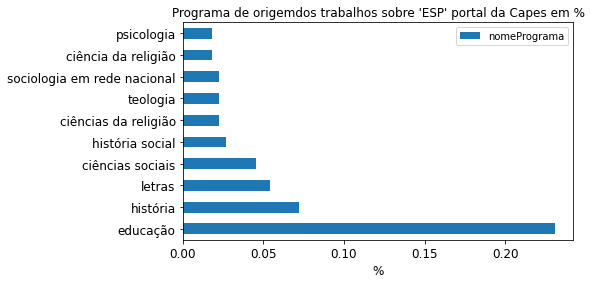

In [22]:
# Em %
tab.nomePrograma.value_counts(normalize=True)[:10].plot.barh(title ="Programa de origemdos trabalhos sobre 'ESP' portal da Capes em %", figsize=(7, 4), legend=True, fontsize=12).set_xlabel("%", fontsize=12)
x.get_figure().savefig('origem.pdf', format='pdf')

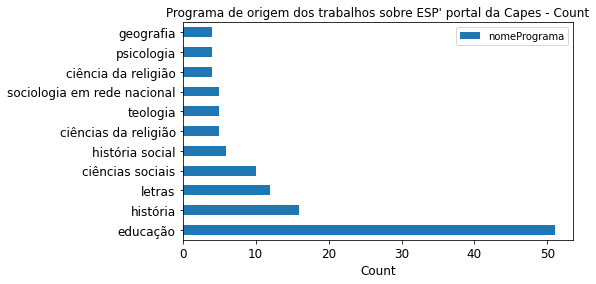

In [23]:
# Count
tab.nomePrograma.value_counts()[:11].plot.barh(title ="Programa de origem dos trabalhos sobre ESP' portal da Capes - Count", figsize=(7, 4), legend=True, fontsize=12).set_xlabel("Count", fontsize=12)
x.get_figure().savefig('origem.pdf', format='pdf')

#### Trabalhos por ano por tipo

In [24]:
d = tab.groupby(tab.dataDefesa.dt.year).grauAcademico.value_counts().sort_index().loc[:,'Doutorado']
m = tab.groupby(tab.dataDefesa.dt.year).grauAcademico.value_counts().sort_index().loc[:,'Mestrado']

In [25]:
m= pd.DataFrame(m)
d = pd.DataFrame(d)

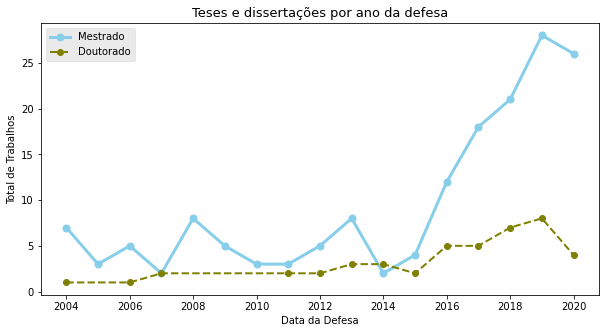

In [26]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.title('Teses e dissertações por ano da defesa', fontdict={'fontsize':13})
plt.plot( m, data=m, marker='.', markerfacecolor='skyblue', markersize=14, color='skyblue', linewidth=3, label="Mestrado")
plt.plot( d, data=d, marker='o', color='olive', linewidth=2, linestyle='dashed', label="Doutorado")
plt.style.use('ggplot')
plt.xlabel('Data da Defesa')
plt.ylabel('Total de Trabalhos')
plt.legend()

## III. Gerando listas por temática

Nessa sessão destacarei listas de trabalhos a partir das palavras contidas no título. Por exemplo, pesquisas sobre Escola sem Partido, selecionarei trabalhos que contenham as palavras específicas no título da obra.

O objetivo é indentificar os trabalhos disponíveis on-line.

#### 3.1 - Escola sem Partido

In [27]:
# Identificar quantos trabalhos usam no título as expressão "Escola sem Partido"
suc['esp'] = suc.Titulo.str.contains('escola sem partido', flags=re.I, regex=True)
tab['esp'] = tab.titulo.str.contains('escola sem partido', flags=re.I, regex=True)

In [28]:
# que possuem resumos on-line
pd.set_option('display.max_colwidth', 300)
esp123 = suc.query('esp == True')
esp123

,Unnamed: 0,IES,Programa,Cod_Area,Titulo,Autor,Tipo,Defesa,Resumo,Keywords,link_trabalho,anos,esp
0,0,Universidade Federal De Goiás,Direitos Humanos,52001016057P9,"As Identidades De Gênero E Sexualidade Na Visão Dos Parlamentares Da Câmara Federal: Uma Análise Do Discurso A Partir Dos Projetos ""Escola Sem Partido""",Isabella Bruna Lemes Pereira,Dissertação,2017-08-17,A presente dissertação tem como objetivo analisar os discursos dos parlamentares quanto aos direitos humanos de pessoas cuja sexualidade ou a identidade de gênero não satisfazem o padrão heternormativo e heterossexual imposto pela sociedade. A metodologia do trabalho foi a análise do discurso a ...,"['Análise', 'do', 'Discurso;Direitos', 'Humanos', 'em', 'perspectiva', 'decolonial;Escola', 'sem', 'Partido;Câmara', 'dos', 'Deputados;Ideologia', 'de', 'Gênero']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5303932,2017,True
2,2,Universidade Federal Fluminense,Estudos De Linguagem,31003010073P1,"Quando Lecionar Pode Virar Crime: O Movimento ""Escola Sem Partido"" Sob Uma Ótica Discursiva.",Fabiany Carneiro De Melo,Dissertação,2017-09-29,"Esta pesquisa teve como foco de análise o movimento “Escola sem Partido” (EsP), criado e coordenado desde 2004 pelo advogado Miguel Nagib. Sob o lema “educação sem doutrinação”, o movimento luta pela criação de uma lei contra “o abuso da liberdade de ensinar” alegando haver uma “instrumentalizaç...","['Escola', 'sem', 'Partido;Análise', 'do', 'Discurso;Educação;trabalho', 'docente']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5968294,2017,True
3,3,Universidade Estadual De Maringá,Ensino De História,31001017155P1,Um Estudo Da Alienação Como Efeito Do Programa Escola Sem Partido: Como Defender O Ofício De Ensinar História,Mauricio Antonio Dal Molin Filho,Dissertação,2018-08-29,"Esta pesquisa se propõe a analisar o Programa Escola sem Partido e sua incidência sobre o ofício do professor, principalmente, no exercício de ensinar História. Existe, na proposta do Programa Escola sem Partido, a ideia de que há doutrinação exercida por parte dos professores brasileiros e q...","['Escola', 'sem', 'Partido;Ensino', 'de', 'história;Alienação;Reificação;Falsa', 'cosnciência']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7416021,2018,True
4,4,Universidade De Pernambuco,Formação De Professores E Práticas Interdisciplinares,25004018070P8,Escola Sem Partido: Um Ataque Direto As Políticas Educacionais De Gênero No Brasil,Camila Dos Passos Roseno,Dissertação,2017-07-20,"O objetivo desta dissertação é compreender a ascensão do Movimento Escola Sem Partido através da aliança feita com os setores conservadores para excluir e proibir as políticas educacionais em gênero e diversidade sexual no Brasil. Trata-se de uma investigação qualitativa, e dessa forma, analisam...","['Escola', 'sem', 'partido;Gênero;Educação;Conservadorismo']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5056712,2017,True
5,5,Universidade Federal De Pelotas,Educação,42003016014P2,Escola Sem Partido (Esp) Versus Professores Contra O Escola Sem Partido (Pcesp): Tensões E Discurso Nas Redes Sociais,Cristiano Guedes Pinheiro,Tese,2017-06-11,"A tese apresentada tem como tema de pesquisa o confronto entre os discursos das organizações Escola Sem Partido (ESP) e o Professores Contra o Escola Sem Partido (PCESP), acerca de um suposto processo de doutrinação ideológica, ocorrido nas salas de aula da Educação Básica e no Ensino Superior n...","['Escola', 'Sem', 'Partido;Professores', 'Contra', 'o', 'Escola', 'Sem', 'Partido;Discurso;Educação;Redes', 'sociais']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConcl

In [29]:
# Título, Palavras-Chave e Resumo
pd.set_option('display.max_colwidth',-1,)
suc.query('esp == True').iloc[:,[1,5,12,2,8,7]]

<ipython-input-29-4333db22646c>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1,)


,IES,Autor,esp,Programa,Resumo,Defesa
0,Universidade Federal De Goiás,Isabella Bruna Lemes Pereira,True,Direitos Humanos,"A presente dissertação tem como objetivo analisar os discursos dos parlamentares quanto aos direitos humanos de pessoas cuja sexualidade ou a identidade de gênero não satisfazem o padrão heternormativo e heterossexual imposto pela sociedade. A metodologia do trabalho foi a análise do discurso a partir de Michel Foucault e Dominique Maingueneau. O material constitutivo da análise, o corpora, foram os discursos escritos ou verbais dos deputados federais, relacionados aos projetos de lei de parlamentares na Câmara dos Deputados com temática afim ao Movimento Escola sem Partido. São eles : PL 7180/2014 (objetiva inserir como princípio a precedência aos valores de ordem familiar sobre a educação escolar nos aspectos relacionados à educação moral, sexual e religiosa), PL 7181/2014 (objetiva aplicar vigência decenal aos PCN), PL 867/2015 (objetiva inserir no PCN o ―Programa Escola sem Partido‖), PL 6005/2016 (objetiva criar do ―Programa Escola Livre‖), PL 1859/2015 (objetiva proibir de desenvolvimento de políticas de ensino que versem sobre ―ideologia de gênero), PL 5487/2016 (objetiva proibir a orientação e distribuição de livros que verse sobre orientação de diversidade sexual para crianças e adolescentes). A compreensão de direitos humanos dos parlamentares é relativa, posto que não abrange a todos, mas se restringem a certas categorias sociais, o que se explica pela forma com que se deu a cidadania brasileira, patriarcal, carregada de conservadorismos e ideais religiosos que impedem um olhar menos preconceituoso, sexista e colonizado sobre as diferenças e as diversas identidades sexuais, e permitem que discursos infundados, como o da ―Ideologia de Gênero‖ se imponham, restringindo espaços que deveriam ser democráticos.",2017-08-17
2,Universidade Federal Fluminense,Fabiany Carneiro De Melo,True,Estudos De Linguagem,"Esta pesquisa teve como foco de análise o movimento “Escola sem Partido” (EsP), criado e coordenado desde 2004 pelo advogado Miguel Nagib. Sob o lema “educação sem doutrinação”, o movimento luta pela criação de uma lei contra “o abuso da liberdade de ensinar” alegando haver uma “instrumentalização político-ideológica para fins específicos” generalizada no ensino brasileiro. Desta forma, o presente estudo buscou responder às seguintes questões: Como se faz possível discursivamente um movimento aos moldes do “Escola sem Partido”? De que maneira se dá a enunciação e propagação de discursos de ódio e desvalorização docente? A partir dessas perguntas que nortearam nossa análise, tivemos por objetivo geral: analisar discursivamente a imagem sobre o professor e seu trabalho à luz do movimento EsP. Nossos objetivos específicos foram: (a) identificar os sentidos estabelecidos na relação escola-professor-sociedade-educação por meio dos discursos que constituem as práticas do movimento; (b) analisar dispositivos de diferentes ordens que configuram discursivamente modos de constituição profissional do sujeito docente e sua relação com o aluno, a partir da materialidade de corpora espiano. Nossas análises recaem sobre o cartaz “Deveres do Professor” elaborado pelo movimento, sobre o artigo intitulado “A ideologia de gênero no banco dos réus” e a carta “Mensagem de fim de ano do coordenador do Escola sem Partido ao militante disfarçado de professor”, ambos de autoria de seu coordenador. Ademais, estabelecemos paralelos com os Projetos de Lei EsP 867/2015 e 193/2016 e com outros materiais divulgados pelo movimento. Baseados em uma concepção de Linguística Aplicada que busca responder a demandas provenientes do social, recorremos na área dos estudos da linguagem a pressupostos teóricos da Análise do Discurso de base enunciativa, mobilizando as noções de formação discursiva (FOUCAULT, 2008; MAINGUENEAU, 2008) e dispositivo (FOUCAULT apud FANLO, 2011) e às categorias de heterogeneidade constitutiva (MAINGUENEAU, 1997

In [30]:
# Apenas trabalhos da area de ciencias sociais, história e política
pd.set_option('display.max_colwidth', -1)
xpto = esp123[esp123.Programa.str.contains('política|soci|história|humanos|educ', flags=re.I, regex=True)]
xpto.iloc[:,[1,5,12,2,8,7]]

<ipython-input-30-c21425fbcff8>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,IES,Autor,esp,Programa,Resumo,Defesa
0,Universidade Federal De Goiás,Isabella Bruna Lemes Pereira,True,Direitos Humanos,"A presente dissertação tem como objetivo analisar os discursos dos parlamentares quanto aos direitos humanos de pessoas cuja sexualidade ou a identidade de gênero não satisfazem o padrão heternormativo e heterossexual imposto pela sociedade. A metodologia do trabalho foi a análise do discurso a partir de Michel Foucault e Dominique Maingueneau. O material constitutivo da análise, o corpora, foram os discursos escritos ou verbais dos deputados federais, relacionados aos projetos de lei de parlamentares na Câmara dos Deputados com temática afim ao Movimento Escola sem Partido. São eles : PL 7180/2014 (objetiva inserir como princípio a precedência aos valores de ordem familiar sobre a educação escolar nos aspectos relacionados à educação moral, sexual e religiosa), PL 7181/2014 (objetiva aplicar vigência decenal aos PCN), PL 867/2015 (objetiva inserir no PCN o ―Programa Escola sem Partido‖), PL 6005/2016 (objetiva criar do ―Programa Escola Livre‖), PL 1859/2015 (objetiva proibir de desenvolvimento de políticas de ensino que versem sobre ―ideologia de gênero), PL 5487/2016 (objetiva proibir a orientação e distribuição de livros que verse sobre orientação de diversidade sexual para crianças e adolescentes). A compreensão de direitos humanos dos parlamentares é relativa, posto que não abrange a todos, mas se restringem a certas categorias sociais, o que se explica pela forma com que se deu a cidadania brasileira, patriarcal, carregada de conservadorismos e ideais religiosos que impedem um olhar menos preconceituoso, sexista e colonizado sobre as diferenças e as diversas identidades sexuais, e permitem que discursos infundados, como o da ―Ideologia de Gênero‖ se imponham, restringindo espaços que deveriam ser democráticos.",2017-08-17
3,Universidade Estadual De Maringá,Mauricio Antonio Dal Molin Filho,True,Ensino De História,"Esta pesquisa se propõe a analisar o Programa Escola sem Partido e sua incidência sobre o ofício do professor, principalmente, no exercício de ensinar História. Existe, na proposta do Programa Escola sem Partido, a ideia de que há doutrinação exercida por parte dos professores brasileiros e que tal prática precisa ser monitorada e denunciada a fim de não interferir política, religiosa e ideologicamente na formação do aluno. Utilizamos, como fontes de análise, os Projetos de Lei 7180/2014 e o 193/2016, bem como material oriundo de canais de comunicação cujo conteúdo nos permitiu lançar a hipótese de que há uma intenção de controle e cerceamento ao trabalho do professor, comprometendo o processo criativo e interferindo no método de ensino-aprendizagem. A partir disso, elencamos o fenômeno da alienação incutido na essência do Programa Escola sem Partido. A condição da alienação se faz presente tanto nas ações refletidas e derivadas do referido Programa, criando um aparato de denúncias que transformam o cenário educacional em um espaço de judicialização, quanto nos agentes propugnadores, quando incentivados a fiscalizar os conteúdos ministrados em sala de aula, culminando na criação dos sintomas de falsa consciência e reificação no ato de aprender e ensinar História.",2018-08-29
5,Universidade Federal De Pelotas,Cristiano Guedes Pinheiro,True,Educação,"A tese apresentada tem como tema de pesquisa o confronto entre os discursos das organizações Escola Sem Partido (ESP) e o Professores Contra o Escola Sem Partido (PCESP), acerca de um suposto processo de doutrinação ideológica, ocorrido nas salas de aula da Educação Básica e no Ensino Superior no Brasil, promovido pelos professores. Os objetivos traçados para a pesquisa, por sua vez, foram: o da análise das formações discursivas que constituem esse confronto, expresso nas mídias sociais (Facebook e websites), tanto do ESP quanto do PCESP; a verificação das aproximações e distanciamentos possíveis entre ambos os discursos (com suas dinâmicas ideológ

Text(0.5, 0, 'Ano')

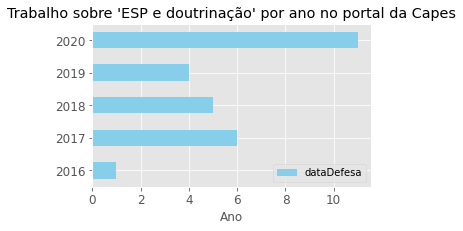

In [31]:
tab[tab['esp']==True].dataDefesa.dt.year.value_counts().sort_index().plot.barh(
    title ="Trabalho sobre 'ESP e doutrinação' por ano no portal da Capes", figsize=(5, 3), color='skyblue', legend=True, fontsize=12).set_xlabel("Ano", fontsize=12)

In [32]:
# Links
linksESP = suc.query('esp == True').link_trabalho.tolist()
linksESP

['https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5303932',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5968294',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7416021',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5056712',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5762133',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=9685107',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5498809',
 'http

#### 3.1.1 - "Escola sem Partido: os projetos de lei"

In [33]:
suc['proj'] = suc.Titulo.str.contains('projeto|projetos|projeto de lei|projetos de lei', flags=re.I, regex=True)
tab['proj'] = tab.titulo.str.contains('projeto|projetos|projeto de lei|projetos de lei', flags=re.I, regex=True)

In [34]:
pd.set_option('display.max_colwidth', -1)
suc[(suc.Titulo.str.contains('projeto',flags=re.I, regex=True))]

<ipython-input-34-d7200dc4b188>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0,IES,Programa,Cod_Area,Titulo,Autor,Tipo,Defesa,Resumo,Keywords,link_trabalho,anos,esp,proj
0,0,Universidade Federal De Goiás,Direitos Humanos,52001016057P9,"As Identidades De Gênero E Sexualidade Na Visão Dos Parlamentares Da Câmara Federal: Uma Análise Do Discurso A Partir Dos Projetos ""Escola Sem Partido""",Isabella Bruna Lemes Pereira,Dissertação,2017-08-17,"A presente dissertação tem como objetivo analisar os discursos dos parlamentares quanto aos direitos humanos de pessoas cuja sexualidade ou a identidade de gênero não satisfazem o padrão heternormativo e heterossexual imposto pela sociedade. A metodologia do trabalho foi a análise do discurso a partir de Michel Foucault e Dominique Maingueneau. O material constitutivo da análise, o corpora, foram os discursos escritos ou verbais dos deputados federais, relacionados aos projetos de lei de parlamentares na Câmara dos Deputados com temática afim ao Movimento Escola sem Partido. São eles : PL 7180/2014 (objetiva inserir como princípio a precedência aos valores de ordem familiar sobre a educação escolar nos aspectos relacionados à educação moral, sexual e religiosa), PL 7181/2014 (objetiva aplicar vigência decenal aos PCN), PL 867/2015 (objetiva inserir no PCN o ―Programa Escola sem Partido‖), PL 6005/2016 (objetiva criar do ―Programa Escola Livre‖), PL 1859/2015 (objetiva proibir de desenvolvimento de políticas de ensino que versem sobre ―ideologia de gênero), PL 5487/2016 (objetiva proibir a orientação e distribuição de livros que verse sobre orientação de diversidade sexual para crianças e adolescentes). A compreensão de direitos humanos dos parlamentares é relativa, posto que não abrange a todos, mas se restringem a certas categorias sociais, o que se explica pela forma com que se deu a cidadania brasileira, patriarcal, carregada de conservadorismos e ideais religiosos que impedem um olhar menos preconceituoso, sexista e colonizado sobre as diferenças e as diversas identidades sexuais, e permitem que discursos infundados, como o da ―Ideologia de Gênero‖ se imponham, restringindo espaços que deveriam ser democráticos.","['Análise', 'do', 'Discurso;Direitos', 'Humanos', 'em', 'perspectiva', 'decolonial;Escola', 'sem', 'Partido;Câmara', 'dos', 'Deputados;Ideologia', 'de', 'Gênero']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5303932,2017,True,True
10,10,Universidade Federal De Pernambuco,Sociologia,25001019012P9,Pânico Moral E Seus Profetas: A Moralização Do Projeto “Escola Sem Homofobia” Nas Eleições Presidenciais De 2018,Lais Campos Casado,Dissertação,2020-08-10,"A presente dissertação analisa a construção de um pânico moral em torno do projeto do Governo Federal Escola Sem Homofobia, pejorativamente nomeado de “Kit Gay” nas eleições presidenciais de 2018 no Brasil. Ao enquadrar conceitualmente o “Kit Gay” como elemento central no pânico moral foi estabelecido dois passos metodológicos. Primeiramente foram identificados os dois pastores evangélicos que possuem um alto número de seguidores e vasta repercussão nas redes sociais, considerados como “influenciadores espirituais”. Esses atores são tipificados como empreendedores da moral que produzem e reproduzem informações sobre o pânico. Em segundo lugar, foram selecionados dois websites direcionados ao público evangélico, de forma a identificar a construção do consenso em torno do pânico moral. Por fim, analisamos em que medida o “kit gay” contempla os cinco indicadores de um pânico moral (preocupação, consenso, hostilidade, desproporcionalidade e volatilidade), analisando a frequência e o conteúdo das postagens dos atores selecionados no processo eleitoral de 2018. A análise aponta a centralidade da noção de ideologia de gênero na articulação do pânico moral entre o eleitorado evangélico em torno das sexualidades não heterossexuais e no apoio majoritário desse segmento à candidatura de Jair Bolsonaro.","['pânico', 'moral;ide

In [35]:
#Trabalhos que falam sobre os projetos de lei do ESP
tab[(tab.titulo.str.contains('projeto*',flags=re.I, regex=True))]

,Unnamed: 0,id,instituicao,nomePrograma,municipioPrograma,titulo,autor,dataDefesa,volumes,paginas,biblioteca,grauAcademico,link,anos,esp,proj
0,0,5303932,UNIVERSIDADE FEDERAL DE GOIÁS,direitos humanos,Goiânia,"As identidades de gênero e sexualidade na visão dos parlamentares da Câmara Federal: uma análise do discurso a partir dos projetos ""escola sem partido""",ISABELLA BRUNA LEMES PEREIRA,2017-08-17,1,242,http://repositorio.bc.ufg.br/tede/handle/tede/8065,Mestrado,https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5303932,2017,True,True
10,10,10034174,UNIVERSIDADE FEDERAL DE PERNAMBUCO,sociologia,Recife,PÂNICO MORAL E SEUS PROFETAS: A moralização do projeto ?Escola Sem Homofobia? nas eleições presidenciais de 2018,LAIS CAMPOS CASADO,2020-10-08,1,114,Biblioteca CFCH,Mestrado,https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=10034174,2020,False,True
23,23,5524421,UNIVERSIDADE ESTADUAL DE MATO GROSSO DO SUL,educação,Paranaíba,"CORPO, SEXUALIDADE E RESISTÊNCIAS: o contraste entre as propostas dos projetos denominados “Escola sem Partido” e as perspectivas foucaultianas",THIAGO PEREIRA DOS SANTOS,2017-12-08,01,118,UEMS,Mestrado,https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5524421,2017,True,True
29,29,7692572,"INSTITUTO FED. DE EDUC, CIÊNC E TECNOLOGIA FARROUPILHA",educação profissional e tecnológica,Vitória,PROJETOS QUE COLOCAM EM RISCO A INTEGRAÇÃO CURRICULAR: UM DESAFIO PARA O ENSINO MÉDIO INTEGRADO,EVANDRO BOTH,2019-06-07,undefined,undefined,Biblioteca João Ari de Lima Ferreira - Sicha,Mestrado Profissional,https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7692572,2019,False,True
35,35,6549710,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,letras,Rio de Janeiro,Do visor na porta das salas de aula à mordaça nos professores: uma análise discursiva das redes conservadoras do Escola Sem Partido - Projeto de Lei 867/2015,JULIANA SILVA RETTICH,2018-03-26,1,132,Biblioteca do Centro de Educação e Humanidades,Mestrado,https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=6549710,2018,True,True
50,50,7005287,UNIVERSIDADE FEDERAL DA GRANDE DOURADOS,sociologia,Dourados,A “IDEOLOGIA DE GÊNERO” COMO UMA PRÁTICA DISCURSIVA TAGARELA DE SILENCIAMENTO: UMA ANÁLISE GENEALÓGICA DO PROJETO DE LEI ESCOLA SEM PARTIDO,CAMILA CAMARGO FERREIRA,2018-04-24,1,205,UFGD,Mestrado,https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7005287,2018,True,True
105,105,5654631,UNIVERSIDADE FEDERAL DE LAVRAS,educação,Lavras,TEMPOS DISTÓPICOS? DIMENSÃO POLÍTICA DA EDUCAÇÃO NOS PROJETOS SOCIAIS DE FAHRENHEIT 451 E ADMIRÁVEL MUNDO NOVO.,NILBER MARTINS ROSA,2017-12-07,1,122,BIBLIOTECA UNIVERSITÁRIA DA UFLA,Mestrado Profissional,https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5654631,2017,False,True
178,178,200411640005011005P0,UNIVERSIDADE ESTADUAL DE PONTA GROSSA,educação,Ponta Grossa,A possibilidade da reflexão ética na educação: construindo um projeto alternativo de sociedade.,Lorena Ferreira Portes,2004-03-01,1,168,Biblioteca do Bloco M,Mestrado,NaN,2004,False,True


In [36]:
#Titulo
pd.set_option('display.max_colwidth', -1)
suc[(suc.Titulo.str.contains('projeto*',flags=re.I, regex=True))].iloc[:,[0,1,5,2,6,8,12]]

<ipython-input-36-fb1c2d70aa16>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0,IES,Autor,Programa,Tipo,Resumo,esp
0,0,Universidade Federal De Goiás,Isabella Bruna Lemes Pereira,Direitos Humanos,Dissertação,"A presente dissertação tem como objetivo analisar os discursos dos parlamentares quanto aos direitos humanos de pessoas cuja sexualidade ou a identidade de gênero não satisfazem o padrão heternormativo e heterossexual imposto pela sociedade. A metodologia do trabalho foi a análise do discurso a partir de Michel Foucault e Dominique Maingueneau. O material constitutivo da análise, o corpora, foram os discursos escritos ou verbais dos deputados federais, relacionados aos projetos de lei de parlamentares na Câmara dos Deputados com temática afim ao Movimento Escola sem Partido. São eles : PL 7180/2014 (objetiva inserir como princípio a precedência aos valores de ordem familiar sobre a educação escolar nos aspectos relacionados à educação moral, sexual e religiosa), PL 7181/2014 (objetiva aplicar vigência decenal aos PCN), PL 867/2015 (objetiva inserir no PCN o ―Programa Escola sem Partido‖), PL 6005/2016 (objetiva criar do ―Programa Escola Livre‖), PL 1859/2015 (objetiva proibir de desenvolvimento de políticas de ensino que versem sobre ―ideologia de gênero), PL 5487/2016 (objetiva proibir a orientação e distribuição de livros que verse sobre orientação de diversidade sexual para crianças e adolescentes). A compreensão de direitos humanos dos parlamentares é relativa, posto que não abrange a todos, mas se restringem a certas categorias sociais, o que se explica pela forma com que se deu a cidadania brasileira, patriarcal, carregada de conservadorismos e ideais religiosos que impedem um olhar menos preconceituoso, sexista e colonizado sobre as diferenças e as diversas identidades sexuais, e permitem que discursos infundados, como o da ―Ideologia de Gênero‖ se imponham, restringindo espaços que deveriam ser democráticos.",True
10,10,Universidade Federal De Pernambuco,Lais Campos Casado,Sociologia,Dissertação,"A presente dissertação analisa a construção de um pânico moral em torno do projeto do Governo Federal Escola Sem Homofobia, pejorativamente nomeado de “Kit Gay” nas eleições presidenciais de 2018 no Brasil. Ao enquadrar conceitualmente o “Kit Gay” como elemento central no pânico moral foi estabelecido dois passos metodológicos. Primeiramente foram identificados os dois pastores evangélicos que possuem um alto número de seguidores e vasta repercussão nas redes sociais, considerados como “influenciadores espirituais”. Esses atores são tipificados como empreendedores da moral que produzem e reproduzem informações sobre o pânico. Em segundo lugar, foram selecionados dois websites direcionados ao público evangélico, de forma a identificar a construção do consenso em torno do pânico moral. Por fim, analisamos em que medida o “kit gay” contempla os cinco indicadores de um pânico moral (preocupação, consenso, hostilidade, desproporcionalidade e volatilidade), analisando a frequência e o conteúdo das postagens dos atores selecionados no processo eleitoral de 2018. A análise aponta a centralidade da noção de ideologia de gênero na articulação do pânico moral entre o eleitorado evangélico em torno das sexualidades não heterossexuais e no apoio majoritário desse segmento à candidatura de Jair Bolsonaro.",False
23,23,Universidade Estadual De Mato Grosso Do Sul,Thiago Pereira Dos Santos,Educação,Dissertação,"No momento histórico atual, marcado por incertezas advindas de uma política instável e que tem por característica a retomada do conservadorismo e de movimentos reacionários em suas relações de poder, os corpos e a sexualidade vêm sofrendo constantes ações com vistas à normalização de condutas a partir de discursos que buscam universalizar a moral por meio de imposições legais, tendo por consequência a perda de direitos civis das populações historicamente marginalizadas por essa perspectiva política que perdura por séculos, o que produz contra-efeitos diante deste poder normalizador. Frente ao expost

In [37]:
#Trabalhos que falam sobre os projetos de lei do ESP
n = suc[(suc.Resumo.str.contains('projeto*',flags=re.I, regex=True))]
n.to_csv('lista_de_trabalhos_ESP_RESUMO.csv')

In [38]:
suc[(suc.Resumo.str.contains('projeto*',flags=re.I, regex=True))]

,Unnamed: 0,IES,Programa,Cod_Area,Titulo,Autor,Tipo,Defesa,Resumo,Keywords,link_trabalho,anos,esp,proj
0,0,Universidade Federal De Goiás,Direitos Humanos,52001016057P9,"As Identidades De Gênero E Sexualidade Na Visão Dos Parlamentares Da Câmara Federal: Uma Análise Do Discurso A Partir Dos Projetos ""Escola Sem Partido""",Isabella Bruna Lemes Pereira,Dissertação,2017-08-17,"A presente dissertação tem como objetivo analisar os discursos dos parlamentares quanto aos direitos humanos de pessoas cuja sexualidade ou a identidade de gênero não satisfazem o padrão heternormativo e heterossexual imposto pela sociedade. A metodologia do trabalho foi a análise do discurso a partir de Michel Foucault e Dominique Maingueneau. O material constitutivo da análise, o corpora, foram os discursos escritos ou verbais dos deputados federais, relacionados aos projetos de lei de parlamentares na Câmara dos Deputados com temática afim ao Movimento Escola sem Partido. São eles : PL 7180/2014 (objetiva inserir como princípio a precedência aos valores de ordem familiar sobre a educação escolar nos aspectos relacionados à educação moral, sexual e religiosa), PL 7181/2014 (objetiva aplicar vigência decenal aos PCN), PL 867/2015 (objetiva inserir no PCN o ―Programa Escola sem Partido‖), PL 6005/2016 (objetiva criar do ―Programa Escola Livre‖), PL 1859/2015 (objetiva proibir de desenvolvimento de políticas de ensino que versem sobre ―ideologia de gênero), PL 5487/2016 (objetiva proibir a orientação e distribuição de livros que verse sobre orientação de diversidade sexual para crianças e adolescentes). A compreensão de direitos humanos dos parlamentares é relativa, posto que não abrange a todos, mas se restringem a certas categorias sociais, o que se explica pela forma com que se deu a cidadania brasileira, patriarcal, carregada de conservadorismos e ideais religiosos que impedem um olhar menos preconceituoso, sexista e colonizado sobre as diferenças e as diversas identidades sexuais, e permitem que discursos infundados, como o da ―Ideologia de Gênero‖ se imponham, restringindo espaços que deveriam ser democráticos.","['Análise', 'do', 'Discurso;Direitos', 'Humanos', 'em', 'perspectiva', 'decolonial;Escola', 'sem', 'Partido;Câmara', 'dos', 'Deputados;Ideologia', 'de', 'Gênero']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5303932,2017,True,True
2,2,Universidade Federal Fluminense,Estudos De Linguagem,31003010073P1,"Quando Lecionar Pode Virar Crime: O Movimento ""Escola Sem Partido"" Sob Uma Ótica Discursiva.",Fabiany Carneiro De Melo,Dissertação,2017-09-29,"Esta pesquisa teve como foco de análise o movimento “Escola sem Partido” (EsP), criado e coordenado desde 2004 pelo advogado Miguel Nagib. Sob o lema “educação sem doutrinação”, o movimento luta pela criação de uma lei contra “o abuso da liberdade de ensinar” alegando haver uma “instrumentalização político-ideológica para fins específicos” generalizada no ensino brasileiro. Desta forma, o presente estudo buscou responder às seguintes questões: Como se faz possível discursivamente um movimento aos moldes do “Escola sem Partido”? De que maneira se dá a enunciação e propagação de discursos de ódio e desvalorização docente? A partir dessas perguntas que nortearam nossa análise, tivemos por objetivo geral: analisar discursivamente a imagem sobre o professor e seu trabalho à luz do movimento EsP. Nossos objetivos específicos foram: (a) identificar os sentidos estabelecidos na relação escola-professor-sociedade-educação por meio dos discursos que constituem as práticas do movimento; (b) analisar dispositivos de diferentes ordens que configuram discursivamente modos de constituição profissional do sujeito docente e sua relação com o aluno, a partir da materialidade de corpora espiano. Nossas análises recaem sobre o cartaz “Deveres do Professor” elaborado pelo movimento, sobre o artigo intitulado “A ideologia de gênero no banco 

In [39]:
# Título, Palavras-Chave e Resumo
pd.set_option('display.max_colwidth', 500)
tab.query('proj == True').to_csv('lista de trabalhos sobre projetos ESP(tab).csv', sep=';', encoding='CP1252')

Text(0.5, 0, 'Ano')

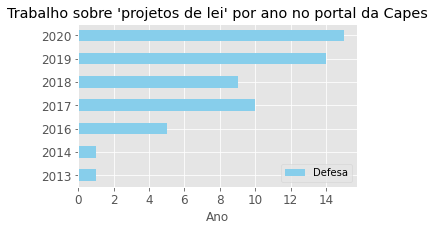

In [40]:
suc[(suc.Resumo.str.contains('projeto*',flags=re.I, regex=True))].Defesa.dt.year.value_counts().sort_index().plot.barh(
    title ="Trabalho sobre 'projetos de lei' por ano no portal da Capes", figsize=(5, 3), color='skyblue',legend=True, fontsize=12).set_xlabel("Ano", fontsize=12)

In [41]:
# Links
linksProj = suc.query('proj == True').link_trabalho.tolist()
linksProj

['https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5303932',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=10034174',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5524421',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7692572',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=6549710',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7005287',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5654631']

#### 3.2 - 'Ideologia de Gênero'

In [42]:
suc['ig'] = suc.Titulo.str.contains('ideologia de gênero', flags=re.I, regex=True)
tab['ig'] = tab.titulo.str.contains('ideologia de gênero', flags=re.I, regex=True)

In [43]:
pd.set_option('display.max_colwidth', 100)
suc[suc['ig'] == True]

,Unnamed: 0,IES,Programa,Cod_Area,Titulo,Autor,Tipo,Defesa,Resumo,Keywords,link_trabalho,anos,esp,proj,ig
8,8,Universidade Estadual De Campinas,Educação,33003017001P2,Por Que Não Falar De Gênero? A Polêmica Da Ideologia De Gênero E Os Planos Municipais E Nacional...,Gabriela Campos Dos Santos,Dissertação,2018-10-26,A seguinte pesquisa teve por foco compreender quais as forças/relações de poder que se colocaram...,"['gênero;ideologia', 'de', 'gênero;educação;políticas', 'públicas']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoCon...,2018,False,False,True
11,11,Universidade Tecnológica Federal Do Paraná,Tecnologia E Sociedade,40006018002P8,"""Não Se Abre À Força Um Botão De Rosa E, Sobretudo, Com As Mãos Sujas"": Agruras Da Educação Sexu...",Kaciane Daniella De Almeida,Tese,2017-08-12,"ALMEIDA, Kaciane Daniella De. “NÃO SE ABRE À FORÇA UM BOTÃO DE ROSA, E SOBRETUDO, COM AS MÃOS SU...","['Ideologia', 'de', 'gênero;Educação', 'Sexual;religião;família;estado']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoCon...,2017,False,False,True
15,15,Universidade De Brasília,Direitos Humanos E Cidadania,53001010095P4,Os Estudos Feministas Sobre “Ideologia De Gênero” No Brasil: Uma Análise Das Produções Científicas,Luanna Marley De Oliveira E Silva,Dissertação,2019-08-16,"A partir da importância científica dos estudos de gênero, e considerando os recentes...","['feminismo;gênero;sexualidade;estudos', 'de', 'gênero;ideologia', 'de', 'gênero']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoCon...,2019,False,False,True
18,18,Universidade De São Paulo,Psicologia Social,33002010040P1,"O Discurso Da ""Ideologia De Gênero"" Na Câmara Dos Deputados: Análise Crítico-Discursiva E Psicop...",Henrique Araujo Aragusuku,Dissertação,2019-07-02,O discurso da “ideologia de gênero” pode ser compreendido enquanto um discurso político que mobi...,"['Gênero;Sexualidade;Análise', 'do', 'Discurso;Psicologia', 'Política;Conservadorismo']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoCon...,2019,False,False,True
19,19,Universidade Federal De Mato Grosso,Antropologia Social,50001019037P2,"""Ideologia De Gênero” No Cotidiano Escolar Em Escola Do Município De Cuiabá, Mato Grosso.",Josiane Marconi Fernandes De Seixas Oliveira,Dissertação,2017-11-09,Esta dissertação é resultado de reflexões e problematizações acerca de observações que ocorreram...,"['Ideologia', 'de', 'Gênero;Cotidiano', 'Escolar;Equidade', 'de', 'Gênero']",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoCon...,2017,False,False,True
20,20,Fundação Universidade Federal Do Tocantins,Educaçao,16003012013P2,O Discurso Midiático Da Ideologia De Gênero E Sua Ressonância Nos Planos Estadual E Municipais D...,Marcos Felipe Goncalves Maia,Dissertação,2017-06-03,Resumo: Esta dissertação reflete sobre a concepção do tema da ideologia de gênero e sua reverbe...,"['Gênero.', 'Sexualidade.', 'Política', 'pública', 'de', 'educação.', 'Sistemas', 'políticos.', ...",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoCon...,2017,False,False,True
22,22,Universidade Federal Do Rio Grande Do Sul,Educação,42001013001P5,Possibilidades Para Um Trabalho Docente Feminista Professoras Mulheres Da Rede Municipal De Ensi...,Bruna Dalmaso Junqueira,Dissertação,2018-07-20,Esta dissertação analisa como professoras mulheres da Rede Municipal de Ensino (RME) de Porto Al...,"['Grupo', 'Focal;Ideologia', 'de', 'Gênero;Gênero;Trabalho', 'Docente', 'Feminino;Estudos', 'de'...",https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoCon...,2018,False,False,True
24,24,Universidade Estadual Paulista Júlio De Mesquita Filho ( Marília ),Sociologia Em Rede Nacional,25016016039P8,Os Fundamentos Liberais Conservadores Da Ideologia De Gênero 

In [44]:
# Título, Palavras-Chave e Resumo
pd.set_option('display.max_colwidth', -1)
suc.query('ig == True').iloc[:,[1,5,12,2,8,7]]

<ipython-input-44-08c4aeaf2bef>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,IES,Autor,esp,Programa,Resumo,Defesa
8,Universidade Estadual De Campinas,Gabriela Campos Dos Santos,False,Educação,"A seguinte pesquisa teve por foco compreender quais as forças/relações de poder que se colocaram em cena no debate sobre gênero nas políticas educativas contemporâneas, analisando como elas se manifestaram nos processos de elaboração dos Planos Nacional e Municipais de Educação, sobretudo tendo em vista o caso específico dos municípios de Sorocaba (SP) e Apiaí (SP), e também focamos em como estes debates se manifestaram na esfera pública, através de análise de notícias, reportagens e postagens de redes sociais. Para realizar tal debate, fundamentamo-nos, majoritariamente, no pensamento genealógico de Michel Foucault, no que diz respeito ao modo como o poder se manifesta e é produzido, orientando a vida e as condutas dos seres humanos em sociedade e no que se refere aos dispositivos que contribuem para a produção de determinados modos de subjetividade, destacando aqui os discursos presentes nos Planos de Educação e nos processos de construção destes. Foi possível observar, portanto, que as violências perpassam o dito e o não dito, parecendo sentirem-se mais à vontade para consolidar-se onde o não dito é a regra, e passam a ser incômodas quando são observadas e ditas, onde o privilégio se vê com pouca voz e reivindica novamente sua fala.",2018-10-26
11,Universidade Tecnológica Federal Do Paraná,Kaciane Daniella De Almeida,False,Tecnologia E Sociedade,"ALMEIDA, Kaciane Daniella De. “NÃO SE ABRE À FORÇA UM BOTÃO DE ROSA, E SOBRETUDO, COM AS MÃOS SUJAS”:agruras da Educação Sexual no ambiente escolar e os desafios atuais frente à Ideologia de gênero. 2017. 000f. Tese (Doutorado em Tecnologia e Sociedade) – Programa de Pós Graduação em Tecnologia e Sociedade. Universidade Tecnológica Federal do Paraná. Curitiba,2017. O objetivo desta tese é analisar como a emergência do discurso sobre ideologia de gênero caracteriza-se uma reação contraria a efetivação da educação sexual no Brasil. Este trabalho articula a discussão que vem vinculando gênero com o discurso da “Ideologia de gênero” e à educação sexual sistemática no Brasil. A metodologia consiste em pesquisa documental, apoiada no referencial teórico pós-crítico utilizando a análise do discurso foucaultiana como instrumento analítico. Para desenvolver este trabalho realizou-se uma pesquisa na internet sobre o termo Ideologia de gênero e sua notoriedade durante a votação do Plano Nacional de Educação – PNE (2014-2024). A pesquisa recolheu informações por meio da ferramenta de busca livre no Google, em que foram selecionados dezessete artigos, que compõe o Quadro 1 - Ideologia de gênero, em que buscou a origem do termo ideologia de gênero, e dezoito artigos que compõe o Quadro 5 - Ideologia de gênero no PNE, em que foram usadas as palavras chaves, ideologia de gênero no PNE. O termo “ideologia de gênero” passou a ser usado em por movimentos contrários a discussão de gênero e orientação, o termo ganhou notoriedade durante a votação do PNE (2014-2024), e foi difundido por meio da igreja Católica. No diálogo que se estabeleceu entre a Educação Sexual e a “Ideologia de gênero”, verificou-se que existe um discurso conservador que vem alicerçando um debate a respeito de existir tal “ideologia de gênero” em detrimento do campo de estudos de gênero. O discurso identificado em relação à Educação Sexual em outros momentos da história se assemelha com o atual, em que há presença marcante da família, da religião em posicionamentos políticos do Estado. Esses seguimentos conseguem alavancar um discurso que estimula a proteção da criança, privando-a do conteúdo da Educação Sexual, bem como a discussão que envolve a responsabilidade de educar para a sexualidade.",2017-08-12
15,Universidade De Brasília,Luanna Marley De Oliveira E Silva,False,Direitos Humanos E Cidadania,"A partir da importância científica dos estudos de gênero, e considerando os recentes debates sobre as mobilizações polí

Text(0.5, 0, 'Ano')

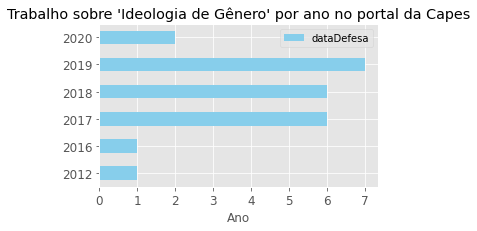

In [45]:
tab[tab['ig']==True].dataDefesa.dt.year.value_counts().sort_index().plot.barh(
    title ="Trabalho sobre 'Ideologia de Gênero' por ano no portal da Capes", figsize=(5, 3), color='skyblue',legend=True, fontsize=12).set_xlabel("Ano", fontsize=12)

In [46]:
# Links
linksIG = suc.query('ig == True').link_trabalho.tolist()
linksIG

['https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7283698',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5367749',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7698373',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7628858',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=6102992',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=4955864',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=6381968',
 'http

#### 3.3 - 'Doutrinação'

In [47]:
suc['d'] = suc.Titulo.str.contains('dout|ideologização|esquerdismo|marxismo|sexualização', flags=re.I, regex=True)
tab['d'] = tab.titulo.str.contains('dout|ideologização|esquerdismo|marxismo|sexualização', flags=re.I, regex=True)

In [48]:
pd.set_option('display.max_colwidth', 50)
suc.query('d == True')

,Unnamed: 0,IES,Programa,Cod_Area,Titulo,Autor,Tipo,Defesa,Resumo,Keywords,link_trabalho,anos,esp,proj,ig,d
13,13,Universidade Federal Do Paraná,Geografia,40001016035P1,Doutrinação: A Influência Do Pensamento Gramsc...,Marcos Antonio Correia,Tese,2015-04-13,"A tese, “Doutrinação: a Influência do Pensamen...","['Gramsci,', 'Geografia', 'Escolar', 'Crítica,...",https://sucupira.capes.gov.br/sucupira/public/...,2015,False,False,False,True
16,16,Universidade Do Estado Do Rio De Janeiro,História Social,31004016046P7,Criando A Doença Para Vender A Cura: O Discurs...,Diogo Da Costa Salles,Dissertação,2019-04-25,"SALLES, D. C. Criando a doença para vender a c...","['Escola', 'Sem', 'Partido;Doutrinação', 'ideo...",https://sucupira.capes.gov.br/sucupira/public/...,2019,True,False,False,True
38,38,Fundacao Joaquim Nabuco,Sociologia Em Rede Nacional,25016016039P8,Percepções Docentes Sobre O Movimento Escola S...,Sayara Francielle Camara Pimentel Santos,Dissertação,2020-09-28,O objeto de estudo neste trabalho foi a discip...,"['Doutrinação', 'Ideológica;Docência;Movimento...",https://sucupira.capes.gov.br/sucupira/public/...,2020,True,False,False,True
56,56,Universidade Federal Do Paraná,Geografia,40001016035P1,Da Ética Geocrítica À Ética Socioambiental: A ...,Herivelto Soares Da Costa,Tese,2016-04-05,Esta tese analisa a doutrinação no campo geogr...,"['doutrinação,', 'ensino,', 'ética', 'geocríti...",https://sucupira.capes.gov.br/sucupira/public/...,2016,False,False,False,True
93,93,Universidade De São Paulo,Psicologia Escolar E Do Desenvolvimento Humano,33002010038P7,Por Que Clamam Por Uma Escola Livre De Doutrin...,Gabriel Katsumi Saito,Dissertação,2019-12-13,"Nos últimos anos, é perceptível o clamor por u...","['Adesão', 'à', 'ideologia', 'Doutrinação', 'E...",https://sucupira.capes.gov.br/sucupira/public/...,2019,False,False,False,True
94,94,Universidade Federal Do Paraná,História,40001016009P0,Operação Pequeno Príncipe: A Ação Da Polícia P...,Jose Dos Santos De Abreu,Dissertação,2015-08-28,A pesquisa analisa a forma de atuação da políc...,"['Poder,', 'Ditadura,', 'ideologia,', 'Violênc...",https://sucupira.capes.gov.br/sucupira/public/...,2015,False,False,False,True
97,97,Universidade Comunitária Da Região De Chapecó,Educação,41016017004P5,"É Preciso Plasmar Na Cera Virgem, Que É A Alma...",Zenaide Ines Schmitz,Dissertação,2015-07-08,O Estado Novo (1937-1945) utilizou diversos el...,"['Estado', 'Novo.', 'Nacionalismo.', 'Getúlio'...",https://sucupira.capes.gov.br/sucupira/public/...,2015,False,False,False,True
109,109,Pontifícia Universidade Católica Do Rio Grande...,História,42005019005P6,Fascismo À Brasileira: Juventude E Imprensa Co...,Andrelise Gauterio Santorum,Dissertação,2018-08-03,Objetivando a doutrinação das massas para a po...,"['Juventude;Fascismo;Integralismo;Juventude', ...",https://sucupira.capes.gov.br/sucupira/public/...,2018,False,False,False,True
112,112,Universidade Federal De Santa Maria,Letras,42002010014P0,“Escola Sem Doutrinação”: Um Patrulhamento Ide...,Rocheli Regina Predebon Silveira,Dissertação,2019-11-03,Embasados na perspectiva discursiva de linha f...,"['Escola', 'Sem', 'Partido;Patrulhamento', 'id...",https://sucupira.capes.gov.br/sucupira/public/...,2019,False,False,False,True
138,138,Universidade Do Vale Do Rio Dos Sinos,Ciências Da Comunicação,42007011004P2,Doutrinação Versus Liberdade De Cátedra: Midia...,Vivian Rodrigues Jorge,Dissertação,2020-03-23,Optar pela investigação comunicacional de um o...,"['Midiatização;Escola', 'sem', 'Partido;Disput...",https://sucupira.capes.gov.br/sucupira/public/...,2020,True,False,False,True


In [49]:
# Título, Palavras-Chave e Resumo
pd.set_option('display.max_colwidth', -1)
suc.query('d == True').iloc[:,[1,5,12,2,8]]

<ipython-input-49-dd02419d0703>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,IES,Autor,esp,Programa,Resumo
13,Universidade Federal Do Paraná,Marcos Antonio Correia,False,Geografia,"A tese, “Doutrinação: a Influência do Pensamento Gramsciano na Geografia Crítica Escolar Brasileira”, em síntese, procura demonstrar que a Geografia radical ou crítica escolar de matiz marxista, apresenta-se comprometida com ideologias que manifestam, prioritariamente, mote político em detrimento do científico. Ela vem eivada de doutrinação ideológica que se antepõe e altera o processo de produção e disseminação do conhecimento geográfico. O que abre precedente ao contraponto weberiano que diz: a ciência e o ensino não devem misturar-se ao político. Exibe evolução do pensamento gramsciano, sua elaboração pedagógica, bem como algumas categorias e conceitos pertinentes à tese, destacando conceitos de hegemonia, escola única, intelectuais, estado ampliado e sociedade civil. Mostra a prevalência da Geografia Crítica na educação brasileira, assim como traça breve evolução paradigmática da Geografia Acadêmica, seus antecedentes, seu caráter educativo e sua institucionalização no Brasil. Constata a influência de Antonio Gramsci na Geografia Crítica escolar brasileira, por meio de Análise de Conteúdo e forma de comunicação discursiva. Sistematiza Análises de Conteúdo, Documentos (de Bardin) e Impressões Discursivas na disciplina de Geografia, mediante discursos restritos (monólogo, diálogos e grupos restritos) e discursos abrangentes (comunicação de massa) presentes nas DCEs de Geografia do Estado do Paraná e conteúdos expressos nos livros didáticos de Geografia, além de impressões discursivas de professores e coordenadores técnico-pedagógicos de geografia. Estas, mediante fragmentos de conteúdos discursivos (Leitura Flutuante), mostram que a influência gramsciana ocorre nas entrelinhas, por meio de vários autores que muitas vezes não citam, mas usam de seu pensamento, seus temas, seus conceitos e suas categorias."
16,Universidade Do Estado Do Rio De Janeiro,Diogo Da Costa Salles,True,História Social,"SALLES, D. C. Criando a doença para vender a cura: o discurso da ""doutrinação ideológica"" do Movimento Escola Sem Partido. 2019. 143p. Dissertação (Mestrado em História Social) - Faculdade de Formação de Professores - Universidade do Estado do Rio de Janeiro, São Gonçalo, 2019. Esse trabalho é um estudo do Movimento Escola Sem Partido e das influências desse grupo nos rumos dos debates educacionais no Brasil. Essa análise se concentra em destrinchar como o movimento, desde sua criação em 2004 até o ano de 2014, consolidou uma concepção conservadora de educação em torno do discurso de combate ao que seus fundadores e adeptos denominam como “doutrinação ideológica” em salas de aula. Os impactos políticos e educacionais gerados pela categoria “doutrinação ideológica” serão analisados a partir dos campos da educação e do ensino de História, tendo em vista demonstrar com quais perspectivas pedagógicas ela se relaciona e com quais se contrapõe. O trabalho com as fontes levantadas – as produções textuais das principais referências intelectuais do Movimento Escola Sem Partido vinculadas às suas páginas e espaços online – levaram à conclusão de que as propostas político-pedagógicas que o movimento defende são incompatíveis com perspectivas educacionais e históricas baseadas na valorização de princípios democráticos."
38,Fundacao Joaquim Nabuco,Sayara Francielle Camara Pimentel Santos,True,Sociologia Em Rede Nacional,"O objeto de estudo neste trabalho foi a disciplina e a docência de Sociologia no contexto do Movimento Escola Sem Partido e do debate “doutrinação ideológica”. Neste sentido, tivemos por objetivo analisar a percepção de docentes de Sociologia do Ensino Médio sobre o movimento e o referido debate. Para o desenvolvimento da pesquisa, que é de natureza qualitativa e quantitativa, articulamos estudo bibliográfico, análise documental e questionário, visando, respectivamente, investigar o Movimento Escola Sem Partido; caracterizar a c

Text(0.5, 0, 'Ano')

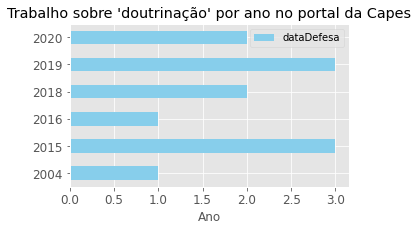

In [50]:
tab[tab['d']==True].dataDefesa.dt.year.value_counts().sort_index().plot.barh(
    title ="Trabalho sobre 'doutrinação' por ano no portal da Capes", figsize=(5, 3), color='skyblue',legend=True, fontsize=12).set_xlabel("Ano", fontsize=12)

In [51]:
# Links doutrinação
linksDoutri = suc.query('d == True').link_trabalho.tolist()
linksDoutri

['https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=2541775',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7640688',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=9486698',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=3634399',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=8038064',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=2498286',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=2569030',
 'http

#### 3.4 - 'Evangélicos'

In [52]:
suc['ev'] = suc.Resumo.str.contains('evang|crist|carismático', flags=re.I, regex=True)
tab['ev'] = tab.titulo.str.contains('evang|crist|carismático', flags=re.I, regex=True)

In [53]:
pd.set_option('display.max_colwidth', 50)
suc.query('ev == True')

,Unnamed: 0,IES,Programa,Cod_Area,Titulo,Autor,Tipo,Defesa,Resumo,Keywords,link_trabalho,anos,esp,proj,ig,d,ev
4,4,Universidade De Pernambuco,Formação De Professores E Práticas Interdiscip...,25004018070P8,Escola Sem Partido: Um Ataque Direto As Políti...,Camila Dos Passos Roseno,Dissertação,2017-07-20,O objetivo desta dissertação é compreender a a...,"['Escola', 'sem', 'partido;Gênero;Educação;Con...",https://sucupira.capes.gov.br/sucupira/public/...,2017,True,False,False,False,True
6,6,Pontifícia Universidade Católica Do Rio Grande...,Educação,42005019001P0,Patriarcado Atualizado: Uma Análise Da Campanh...,Betina Dias Torriani,Dissertação,2020-03-26,"As temáticas de gênero e sexualidade, e sobret...","['gênero;ideologia;educação;“ideologia', 'de',...",https://sucupira.capes.gov.br/sucupira/public/...,2020,False,False,False,False,True
10,10,Universidade Federal De Pernambuco,Sociologia,25001019012P9,Pânico Moral E Seus Profetas: A Moralização Do...,Lais Campos Casado,Dissertação,2020-08-10,A presente dissertação analisa a construção de...,"['pânico', 'moral;ideologia', 'de', 'gênero;Es...",https://sucupira.capes.gov.br/sucupira/public/...,2020,False,True,False,False,True
14,14,Universidade Metodista De São Paulo,Ciências Da Religião,33017018001P0,"""Menino Já Nasce Menino, Menina Já Nasce Menin...",Fernanda Marina Feitosa Coelho,Dissertação,2017-09-18,A presente dissertação trata da fobia de gêner...,"['Ideologia', 'de', 'Gênero”,', 'Plano', 'Naci...",https://sucupira.capes.gov.br/sucupira/public/...,2017,False,False,False,False,True
18,18,Universidade De São Paulo,Psicologia Social,33002010040P1,"O Discurso Da ""Ideologia De Gênero"" Na Câmara ...",Henrique Araujo Aragusuku,Dissertação,2019-07-02,O discurso da “ideologia de gênero” pode ser c...,"['Gênero;Sexualidade;Análise', 'do', 'Discurso...",https://sucupira.capes.gov.br/sucupira/public/...,2019,False,False,True,False,True
25,25,Universidade Federal Fluminense,Política Social,31003010049P3,"Estado, Religião E Democracia: Reflexões A Par...",Amanda Andre De Mendonca,Tese,2017-03-08,Com o propósito de investigar as relações entr...,"['Laicidade;Democracia.', 'Políticas', 'Educac...",https://sucupira.capes.gov.br/sucupira/public/...,2017,False,False,True,False,True
30,30,Universidade Estadual Paulista Júlio De Mesqui...,Educação,33004129044P6,Escola Sem Partido: Indícios De Uma Educação A...,Guilherme Costa Garcia Tommaselli,Tese,2018-09-26,O projeto Escola Sem Partido é fenômeno social...,"['Escola', 'Sem', 'Partido;Educação;Potencial'...",https://sucupira.capes.gov.br/sucupira/public/...,2018,True,False,False,False,True
31,31,Universidade Federal Do Pará,Currículo E Gestão Da Escola Básica,15001016089P3,Disputas Em Torno Do Curriculo: O Processo De ...,Silvane Dos Passos Barbosa Dos Santos Araujo,Dissertação,2020-10-29,No final do ano de 2017 o Ministério da Educaç...,"['identidade', 'de', 'gênero;currículo;orienta...",https://sucupira.capes.gov.br/sucupira/public/...,2020,False,False,False,False,True
32,32,Universidade Federal Fluminense,Educação,31003010001P0,"Escola Sem Partido: Concepções De Escola, Educ...",Helton Messini Da Costa,Dissertação,2019-02-28,"Em 2004, surgia na sociedade brasileira um mov...","['Escola', 'Sem', 'Partido;Educação;Trabalho;F...",https://sucupira.capes.gov.br/sucupira/public/...,2019,True,False,False,False,True
44,44,Universidade Federal Do Rio Grande Do Sul,Educação,42001013001P5,Distopia À Brasileira: A (Re)Produção Do Discu...,Carlos Eduardo Barzotto,Dissertação,2020-09-07,Esta dissertação problematiza a capilarização ...,"['Cidadania', 'Religiosa;Neoliberalismo;Estudo...",https://sucupira.capes.gov.br/sucupira/public/...,2020,False,False,False,False,True


In [54]:
# Título, Palavras-Chave e Resumo e ano
pd.set_option('display.max_colwidth', -1)
suc.query('ev == True').iloc[:,[1,5,12,2,8,7]]

<ipython-input-54-194af1c66de9>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


IES  \
4    Universidade De Pernambuco                                                       
6    Pontifícia Universidade Católica Do Rio Grande Do Sul                            
10   Universidade Federal De Pernambuco                                               
14   Universidade Metodista De São Paulo                                              
18   Universidade De São Paulo                                                        
25   Universidade Federal Fluminense                                                  
30   Universidade Estadual Paulista Júlio De Mesquita Filho ( Presidente Prudente )   
31   Universidade Federal Do Pará                                                     
32   Universidade Federal Fluminense                                                  
44   Universidade Federal Do Rio Grande Do Sul                                        
49   Universidade Federal Rural Do Rio De Janeiro                                     
52   Universidade Federal Fluminense                                                  
62   Universidade Estadual Do Paraná - Reitoria                                       
65   Universidade Federal De Pernambuco                                               
68   Universidade Estadual Do Paraná - Reitoria                                       
73   Universidade Estadual Paulista Júlio De Mesquita Filho ( Marília )               
83   Universidade Federal Da Paraíba ( João Pessoa )                                  
84   Universidade Da Região De Joinville                                              
92   Universidade Estadual Do Sudoeste Da Bahia                                       
98   Universidade Federal Do Espírito Santo                                           
116  Faculdade Jesuíta De Filosofia E Teologia                                        
119  Universidade Federal Do Rio De Janeiro                                           
129  Universidade Federal De Goiás                                                    
130  Centro Federal De Educação Tecnológica De Minas Gerais                           
139  Universidade Federal Da Paraíba ( João Pessoa )                                  
143  Pontifícia Universidade Católica De São Paulo                                    
146  Faculdade Unida De Vitória                                                       
158  Universidade Federal Da Bahia                                                    
159  Universidade Católica De Pernambuco                                              
165  Universidade Estadual Do Sudoeste Da Bahia                                       

                                            Autor    esp  \
4    Camila Dos Passos Roseno                      True    
6    Betina Dias Torriani                          False   
10   Lais Campos Casado                            False   
14   Fernanda Marina Feitosa Coelho                False   
18   Henrique Araujo Aragusuku                     False   
25   Amanda Andre De Mendonca                      False   
30   Guilherme Costa Garcia Tommaselli             True    
31   Silvane Dos Passos Barbosa Dos Santos Araujo  False   
32   Helton Messini Da Costa                       True    
44   Carlos Eduardo Barzotto                       False   
49   Bruna Lasse Araujo                            False   
52   Alexsandra Ferreira Aquino                    False   
62   Lucas Alves Da Silva                          False   
65   Benedito Leite De Souza Junior                False   
68   Daiana Nunes                                  False   
73   Luiz Augusto Mugnai Vieira Junior             False   
83   Joseeldo Pereira Da Silva Junior              False   
84   Maria Angela Nolli                            False   
92   Nilson Sousa Cirqueira                        False   
98   Ana Carolina Caetano Tavares Moreira          False   
116  Marcos Antonio Alencar Duarte                 False   
119  Raquel De Melo Braga                          False   
12

Text(0.5, 0, 'Ano')

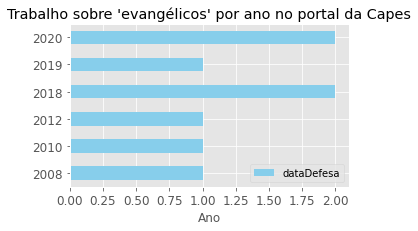

In [55]:
tab[tab['ev']==True].dataDefesa.dt.year.value_counts().sort_index().plot.barh(
    title ="Trabalho sobre 'evangélicos' por ano no portal da Capes", figsize=(5, 3), color='skyblue',legend=True, fontsize=12).set_xlabel("Ano", fontsize=12)

In [56]:
# Links
linksEV = suc.query('ev == True').link_trabalho.tolist()
linksEV

['https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5056712',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=9735598',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=10034174',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5473692',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=7628858',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=5040497',
 'https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/trabalhoConclusao/viewTrabalhoConclusao.jsf?popup=true&id_trabalho=6621604',
 'htt

#### 3.5 Problema Público

In [57]:
suc['pp'] = suc.Resumo.str.contains('problema público|public problems|problemas públicos|sociologia pragmática', flags=re.I, regex=True)
tab['pp'] = tab.titulo.str.contains('problema público|public problems|problemas públicos|sociologia pragmática', flags=re.I, regex=True)

In [58]:
pd.set_option('display.max_colwidth', 50)
suc.query('pp == True')

,Unnamed: 0,IES,Programa,Cod_Area,Titulo,Autor,Tipo,Defesa,Resumo,Keywords,link_trabalho,anos,esp,proj,ig,d,ev,pp


In [59]:
len(suc['pp'])

171

In [60]:
# Título, Palavras-Chave e Resumo e ano
pd.set_option('display.max_colwidth', -1)
suc.query('pp == True').iloc[:,[1,5,12,2,8,7]]

<ipython-input-60-b5934adce4b0>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,IES,Autor,esp,Programa,Resumo,Defesa


In [61]:
# tab[tab['pp']==True].Defesa.dt.year.value_counts().sort_index().plot.barh(title ="Trabalho sobre 'problemas públicos' por ano no portal da Capes", figsize=(5, 3), color='skyblue',legend=True, fontsize=12).set_xlabel("Ano", fontsize=12)

In [62]:
# Links
linksPP = suc.query('pp == True').link.tolist()
linksPP

AttributeError: 'DataFrame' object has no attribute 'link'

#### junta todos os resumos selecionados

In [63]:
ev1 = suc.query('ev == True').iloc[:,[1,5,12,2,8,7]]
doutri = suc.query('d == True').iloc[:,[1,5,12,2,8,7]]
IdGen = suc.query('ig == True').iloc[:,[1,5,12,2,8,7]]
ESP1 = suc.query('esp == True').iloc[:,[1,5,12,2,8,7]]
pp = suc.query('pp == True').iloc[:,[1,5,12,2,8,7]]

In [64]:
tudo = [ev1,doutri,IdGen, ESP1, pp]
SoESP = [ev1,doutri,IdGen, ESP1]

In [65]:
#Todo o Mapeamento
junta = pd.concat(tudo)
#Apenas Mapeamento do ESP
juntaESP = pd.concat(SoESP)

In [66]:
#Todo o Mapeamento
junta.to_excel(r"resumosCompletosESP.xlsx", encoding='CP1252')
#Apenas Mapeamento do ESP
juntaESP.to_excel(r"resumos_APENAS_ESP.xlsx", encoding='CP1252')

In [67]:
tab.anos.value_counts().sort_index()

2004    8 
2005    3 
2006    6 
2007    4 
2008    8 
2009    5 
2010    3 
2011    5 
2012    8 
2013    11
2014    5 
2015    6 
2016    18
2017    27
2018    31
2019    38
2020    35
Name: anos, dtype: int64

## WordCloud

In [86]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [87]:
#Lista de stopwords em PT-BR
stopwords= set(STOPWORDS)

#lista
new_words = []
with open("stopwordsPT.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

PT_stopwords = stopwords.union(new_words)
#new_stopwords

### Keywords

In [88]:
cloud = suc['Keywords']
cloud = pd.DataFrame(cloud)

texto = cloud['Keywords']

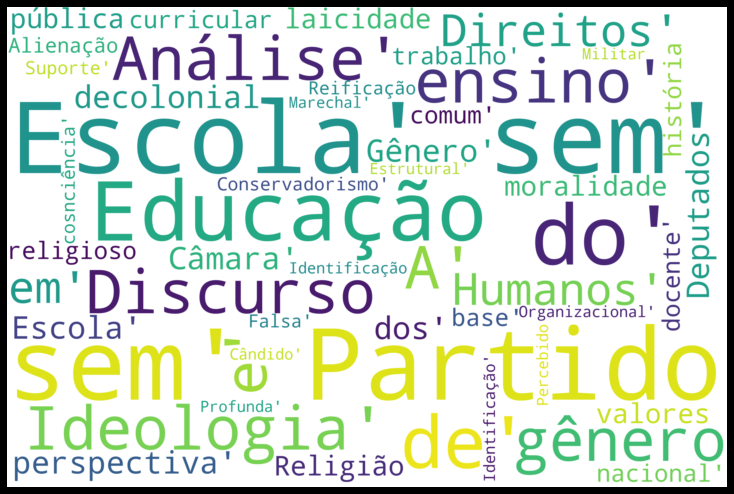

In [89]:
#!pip install wordcloud


wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    max_words=50,  # Total de palavras
    background_color="white",
    stopwords = PT_stopwords).generate(str(texto))
fig = plt.figure(
    figsize = (10, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Resumo

In [90]:

cloud = suc['Resumo']
cloud = pd.DataFrame(cloud)

texto = cloud['Resumo']

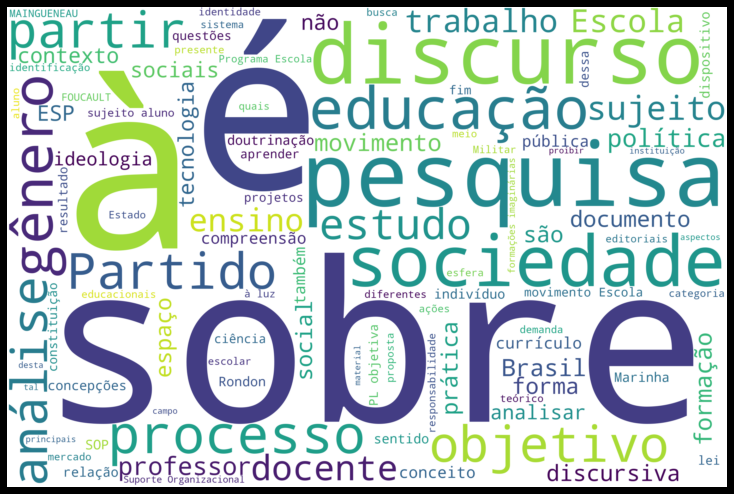

In [91]:
#!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    max_words=100,  # Total de palavras
    background_color="white",
    stopwords = PT_stopwords).generate(str(texto))
fig = plt.figure(
    figsize = (10, 12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()